In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [4]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
train.columns

Index([u'battery_power', u'blue', u'clock_speed', u'dual_sim', u'fc',
       u'four_g', u'int_memory', u'm_dep', u'mobile_wt', u'n_cores', u'pc',
       u'px_height', u'px_width', u'ram', u'sc_h', u'sc_w', u'talk_time',
       u'three_g', u'touch_screen', u'wifi', u'price_range'],
      dtype='object')

In [6]:
train.drop(['n_cores','clock_speed','m_dep'],inplace=True,axis=1)
test.drop(['n_cores','clock_speed','m_dep'],inplace=True,axis=1)

In [7]:
categorical_columns = ['price_range','int_memory','pc','fc']
# categorical_columns = ['n_cores','price_range','int_memory','clock_speed','pc','fc']
categorical_columns2 = ['ram','int_memory','pc','fc']
# categorical_columns2 = ['n_cores','ram','int_memory','clock_speed','pc','fc']
boolean_columns = ['four_g','three_g','dual_sim','touch_screen','wifi','blue']

In [11]:
def convert_to_boolean(x):
    if(x==1):
        return 1
    else:
        return False

In [8]:
for col in categorical_columns: train[col] = train[col].astype('category')

In [9]:
for col in categorical_columns2: test[col] = test[col].astype('category')

In [12]:
for col in boolean_columns: train[col] = train[col].apply(convert_to_boolean).astype(bool);test[col] = test[col].apply(convert_to_boolean).astype(bool)

In [13]:
train['four_g'].dtype

dtype('bool')

In [14]:
train.describe()

,battery_power,mobile_wt,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,140.249000,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,35.399655,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,80.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,109.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,141.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,170.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,200.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


In [15]:
test.describe()

,id,battery_power,mobile_wt,px_height,px_width,sc_h,sc_w,talk_time
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,1248.510000,139.51100,627.121000,1239.774000,11.995000,5.316000,11.085000
std,288.819436,432.458227,34.85155,432.929699,439.670981,4.320607,4.240062,5.497636
min,1.000000,500.000000,80.00000,0.000000,501.000000,5.000000,0.000000,2.000000
25%,250.750000,895.000000,109.75000,263.750000,831.750000,8.000000,2.000000,6.750000
50%,500.500000,1246.500000,139.00000,564.500000,1250.000000,12.000000,5.000000,11.000000
75%,750.250000,1629.250000,170.00000,903.000000,1637.750000,16.000000,8.000000,16.000000
max,1000.000000,1999.000000,200.00000,1907.000000,1998.000000,19.000000,18.000000,20.000000


In [16]:
train[categorical_columns].describe()

,price_range,int_memory,pc,fc
count,2000,2000,2000,2000
unique,4,63,21,20
top,3,27,10,0
freq,500,47,122,474


In [17]:
test[categorical_columns2].describe()

,ram,int_memory,pc,fc
count,1000,1000,1000,1000
unique,872,63,21,20
top,1895,56,16,0
freq,3,27,59,210


In [18]:
mem = np.array(train['talk_time'].unique())
mem.sort()
mem

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])

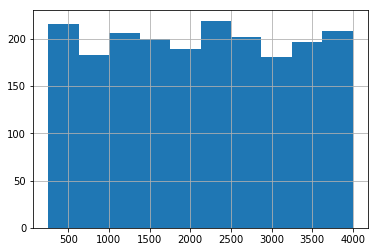

In [19]:
train['ram'].hist()

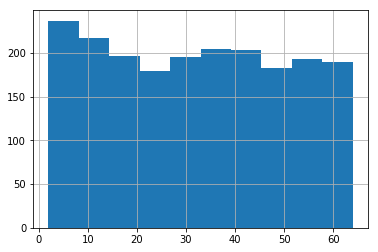

In [20]:
train['int_memory'].hist()

In [21]:
# def create_memory_categories(x):
    

(array([409., 439., 307., 432., 413.]),
 array([ 2. ,  5.6,  9.2, 12.8, 16.4, 20. ]),
 <a list of 5 Patch objects>)

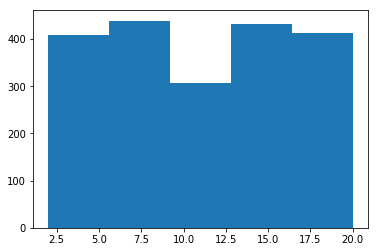

In [22]:
num_bins = 5
plt.hist(train['talk_time'],bins=num_bins)

In [23]:
train.groupby('price_range').mean()

,battery_power,blue,dual_sim,four_g,mobile_wt,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
price_range,,,,,,,,,,,,,,
0,1116.902,0.486,0.500,0.518,140.552,536.408,1150.270,785.314,12.324,5.682,10.612,0.746,0.524,0.496
1,1228.868,0.490,0.510,0.524,140.510,666.892,1251.908,1679.490,12.212,5.544,11.362,0.756,0.522,0.504
2,1228.320,0.486,0.498,0.494,143.614,632.284,1234.046,2582.816,12.010,5.714,10.972,0.774,0.470,0.504
3,1379.984,0.518,0.530,0.550,136.320,744.848,1369.838,3449.232,12.680,6.128,11.098,0.770,0.496,0.524


In [24]:
# sns.pairplot(train,hue='price_range')

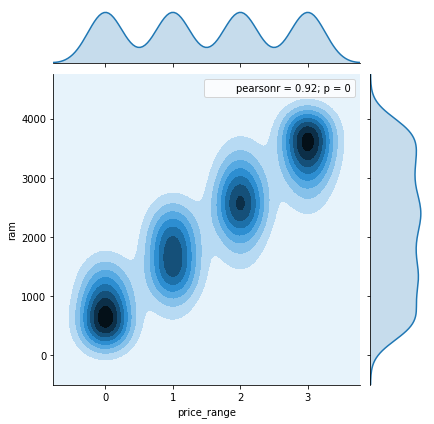

In [25]:
sns.jointplot(y='ram',x='price_range',data=train,kind='kde')

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
battery_power    2000 non-null int64
blue             2000 non-null bool
dual_sim         2000 non-null bool
fc               2000 non-null category
four_g           2000 non-null bool
int_memory       2000 non-null category
mobile_wt        2000 non-null int64
pc               2000 non-null category
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null bool
touch_screen     2000 non-null bool
wifi             2000 non-null bool
price_range      2000 non-null category
dtypes: bool(6), category(4), int64(8)
memory usage: 149.4 KB


In [27]:
# train['three_g'] = train['three_g'].astype('bool')

In [28]:
# train["three_g"] = train["three_g"].apply(convert_to_boolean)

In [50]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#   {'C': [1, 10, 100, 1000], 'kernel': ['poly']}
#   {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

In [46]:
param_grid2 = [
#   {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100], 'kernel': ['poly']}
#   {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

In [31]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [32]:
svc = svm.SVC()

In [33]:
clf = GridSearchCV(svc,param_grid)

In [47]:
clf2 = GridSearchCV(svc,param_grid2)

In [35]:
xg_cl = xgb.XGBClassifier(objective='multi:softmax', n_estimators=200,seed=123,learning_rate=0.15,max_depth=5,colsample_bytree=1,subsample=1)

In [36]:
cols = list(train.columns)
cols.remove('price_range')

cols2 = list(train.columns)
cols2.remove('price_range')
# cols2.remove('clock_speed')
cols2.remove('fc')
cols2.remove('int_memory')
# cols2.remove('n_cores')
cols2.remove('pc')
# cols2.remove('ram')

In [37]:
from sklearn.model_selection import train_test_split

X = train[cols]
y = train['price_range']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123)

In [38]:
train.columns

Index([u'battery_power', u'blue', u'dual_sim', u'fc', u'four_g', u'int_memory',
       u'mobile_wt', u'pc', u'px_height', u'px_width', u'ram', u'sc_h',
       u'sc_w', u'talk_time', u'three_g', u'touch_screen', u'wifi',
       u'price_range'],
      dtype='object')

In [39]:
train2 = pd.get_dummies(train,columns = [ 'fc', 'int_memory', 'pc'])

train2['ram'] = train2['ram'].astype('int')
X2 = train2[cols2]
y2 = train2['price_range']
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,random_state=123)

In [40]:
X_train2.columns

Index([u'battery_power', u'blue', u'dual_sim', u'four_g', u'mobile_wt',
       u'px_height', u'px_width', u'ram', u'sc_h', u'sc_w', u'talk_time',
       u'three_g', u'touch_screen', u'wifi'],
      dtype='object')

In [41]:
xg_cl.fit(X_train2,y_train2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.15, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
       silent=True, subsample=1)

In [48]:
clf2.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['poly'], 'C': [1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [52]:
clf.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [53]:
clf

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [49]:
clf2

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['poly'], 'C': [1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [42]:
predictions1 = clf2.predict(X_test)

In [42]:
preds=xg_cl.predict(X_test2)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [43]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,predictions1)

NameError: name 'predictions1' is not defined

In [44]:
# accuracy_score(y_test2,predictions2)
float(np.sum(preds==y_test))/y_test.shape[0]

0.934

In [55]:
pr = clf.predict(X_test)
accuracy_score(pr,y_test)

0.97

In [56]:
predictions = clf.predict(test[cols])

In [171]:
clf.best_estimator_.coef_

AttributeError: coef_ is only available when using a linear kernel

In [44]:
clf2.predict(test[cols])

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 1, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 1, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 1, 3, 3, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 1, 3, 0, 1, 2, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [57]:
submission = pd.DataFrame({'id':test['id'],'price_range':predictions})
submission.head()

,id,price_range
0,1,3
1,2,3
2,3,2
3,4,3
4,5,1


In [58]:
filename='Mobile_price_Range9.csv'
submission.to_csv(filename,index=False)
print("saved file:"+filename)


saved file:Mobile_price_Range9.csv
